# Perceptron Vs MLP

In this notebook, we'll compare the performance of a perceptron and MLP on a non-linear classification task. We can visually see fow both the models perform in this challenge.

In [26]:
# functioning for generating toy 2D data
import numpy as np # Numpy library is used to work with array. Example: create or modify an array.
def gen_data(n=500):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

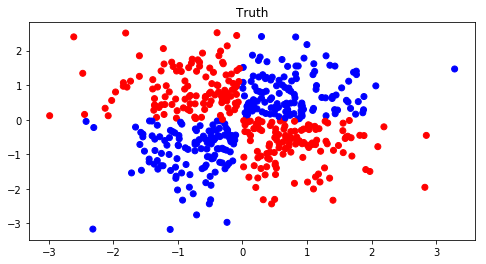

In [27]:
# plt is a visualization module in matplotlib.  
import matplotlib.pyplot as plt

# Generating random samples of two different classes
x_train, y_train = gen_data()

plt.scatter(x_train[:,0], x_train[:,1], color=[['red', 'blue'][x] for x in y_train])
plt.title('Truth')
plt.show()

In [28]:
# keras is a platform for building and training neural networks. 
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.

import keras
from keras.layers import Dense
from keras .models import Sequential 

In [29]:
# Building a perceptron model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Training a perceptron model on the 2D data
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
500/500 [==============================] - 0s 468us/step - loss: 1.0238 - acc: 0.4740
Epoch 2/20
500/500 [==============================] - 0s 33us/step - loss: 1.0175 - acc: 0.4740
Epoch 3/20
500/500 [==============================] - 0s 32us/step - loss: 1.0114 - acc: 0.4740
Epoch 4/20
500/500 [==============================] - 0s 31us/step - loss: 1.0050 - acc: 0.4740
Epoch 5/20
500/500 [==============================] - 0s 34us/step - loss: 0.9988 - acc: 0.4740
Epoch 6/20
500/500 [==============================] - 0s 35us/step - loss: 0.9927 - acc: 0.4740
Epoch 7/20
500/500 [==============================] - 0s 35us/step - loss: 0.9866 - acc: 0.4760
Epoch 8/20
500/500 [==============================] - 0s 35us/step - loss: 0.9808 - acc: 0.4740
Epoch 9/20
500/500 [==============================] - 0s 31us/step - loss: 0.9747 - acc: 0.4760
Epoch 10/20
500/500 [==============================] - 0s 31us/step - loss: 0.9691 - acc: 0.4760
Epoch 11/20
500/500 [=================

In [33]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting the class label for the test data
plt.rcParams['figure.figsize'] = 8, 4
preds = model.predict_classes(x_test).reshape(-1,).astype(np.int8)

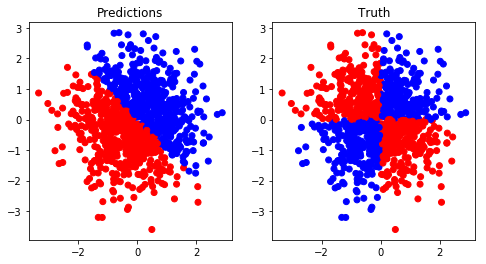

In [34]:
# Ploting the predictions of the perceptron model against ground truth
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [35]:
# 'optimizers' in keras has several variations of gradient decsent that are used for updating weights
from keras import optimizers 

# Building an MLP model with single hidden layer
model2 = Sequential()
model2.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
SGD = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=SGD,
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [36]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Training the MLP on the 2D data
model2.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.7050 - acc: 0.5160
Epoch 2/100
 - 0s - loss: 0.6960 - acc: 0.5140
Epoch 3/100
 - 0s - loss: 0.6978 - acc: 0.4600
Epoch 4/100
 - 0s - loss: 0.6989 - acc: 0.5120
Epoch 5/100
 - 0s - loss: 0.6953 - acc: 0.4760
Epoch 6/100
 - 0s - loss: 0.6987 - acc: 0.4980
Epoch 7/100
 - 0s - loss: 0.6974 - acc: 0.4960
Epoch 8/100
 - 0s - loss: 0.6959 - acc: 0.5020
Epoch 9/100
 - 0s - loss: 0.7004 - acc: 0.5060
Epoch 10/100
 - 0s - loss: 0.7024 - acc: 0.4820
Epoch 11/100
 - 0s - loss: 0.6986 - acc: 0.5280
Epoch 12/100
 - 0s - loss: 0.6970 - acc: 0.5200
Epoch 13/100
 - 0s - loss: 0.7017 - acc: 0.4780
Epoch 14/100
 - 0s - loss: 0.6943 - acc: 0.5200
Epoch 15/100
 - 0s - loss: 0.6956 - acc: 0.5260
Epoch 16/100
 - 0s - loss: 0.6967 - acc: 0.4920
Epoch 17/100
 - 0s - loss: 0.6957 - acc: 0.4960
Epoch 18/100
 - 0s - loss: 0.6907 - acc: 0.5200
Epoch 19/100
 - 0s - loss: 0.6951 - acc: 0.5000
Epoch 20/100
 - 0s - loss: 0.6913 - acc: 0.5200
Epoch 21/100
 - 0s - loss: 0.6922 - acc: 0.4980
E

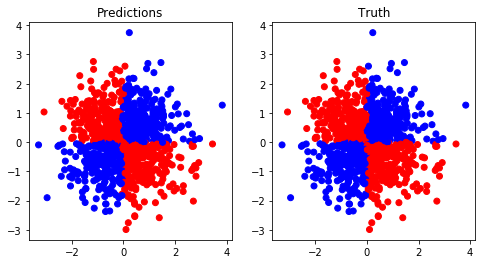

In [38]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting labels using the MLP model
plt.rcParams['figure.figsize'] = 8, 4
preds = model2.predict_classes(x_test).reshape(-1,).astype(np.int8)

# Ploting the predictions against the ground truth labels
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()